In [4]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [5]:
def create_auc_df(dataset, teacher, student):
    #filename = 'results/circular_fingerprint/' + dataset + '_results'
    filename = dataset + '_results'
    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    metric = 'mccs_auc'

    # Initialization 
    teacher_active_values = []
    student_active_values = []
    teacher_passive_values = []
    student_passive_values = []
    teacher_y_student_values = []
    
    labels = []
    dpts = []
    
    # Create name labels
    name_student_passive = student + ' Passive'
    name_student_active = student + ' Active'
    name_teacher_passive = teacher + ' Passive'
    name_teacher_active = teacher + ' Active'
    name_yoked = teacher + ' Yoked ' + student
    
    for i in range(100):
        # Obtain the AUC
        teacher_active_values.append(np.sum(new_dict[teacher][teacher][i][metric]))
        teacher_passive_values.append(np.sum(new_dict['PASSIVE'][teacher][i][metric]))
        student_active_values.append(np.sum(new_dict[student][student][i][metric]))
        student_passive_values.append(np.sum(new_dict['PASSIVE'][student][i][metric]))
        teacher_y_student_values.append(np.sum(new_dict[teacher][student][i][metric]))
        
        size = len(new_dict[teacher][teacher][i][metric])

        labels.append(name_student_active)
        dpts.append(student_active_values[i]/size)

        labels.append(name_student_passive)
        dpts.append(student_passive_values[i]/size)

        labels.append(name_teacher_active)
        dpts.append(teacher_active_values[i]/size)

        labels.append(name_teacher_passive)
        dpts.append(teacher_passive_values[i]/size)

        labels.append(name_yoked)
        dpts.append(teacher_y_student_values[i]/size)

    return labels, dpts

In [8]:
def create_df(dataset, teacher, student):
    #filename = 'results/circular_fingerprint/' + dataset + '_results'
    filename = dataset + '_results'
    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    infile.close()

    # Initialization
    metric = 'mccs_auc'
    x = []
    labels = []
    dpts = []
    
    # Create name labels
    name_student_passive = student + ' Passive'
    name_student_active = student + ' Active'
    name_teacher_passive = teacher + ' Passive'
    name_teacher_active = teacher + ' Active'
    name_yoked = teacher + ' Yoked ' + student
    
    for i in range(10):
        # Obtain the array 
        teacher_active_ = new_dict[teacher][teacher][i][metric]
        teacher_passive_ = new_dict['PASSIVE'][teacher][i][metric]
        student_active_ = new_dict[student][student][i][metric]
        student_passive_ = new_dict['PASSIVE'][student][i][metric]
        teacher_y_student_ = new_dict[teacher][student][i][metric]
        
        for j in range(len(teacher_active_)):
            x.append(j)
            labels.append(name_student_active)
            dpts.append(student_active_[j][0])

            x.append(j)
            labels.append(name_student_passive)
            dpts.append(student_passive_[j][0])

            x.append(j)
            labels.append(name_teacher_active)
            dpts.append(teacher_active_[j][0])

            x.append(j)
            labels.append(name_teacher_passive)
            dpts.append(teacher_passive_[j][0])
            
            x.append(j)
            labels.append(name_yoked)
            dpts.append(teacher_y_student_[j][0])
    
    return x, labels, dpts

<Figure size 432x288 with 0 Axes>

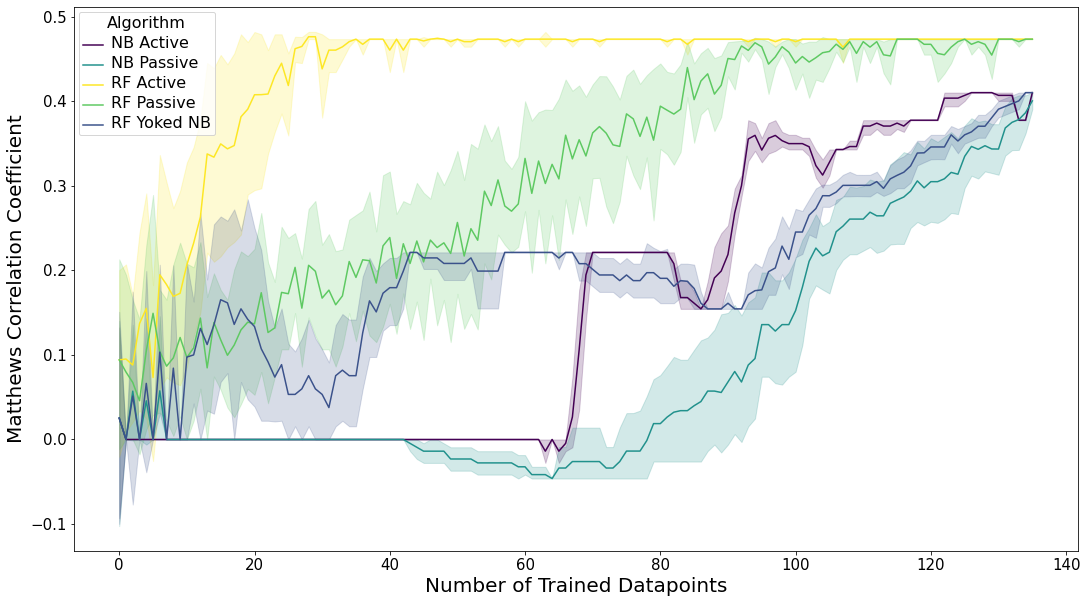

In [9]:
dataset = 'carcinogens'
teacher = 'RF'
student = 'NB'
names = ['RF Active', 'RF Passive', 'NB Active', 'NB Passive','RF yoked NB']
palette = ['#440154', '#21918c','#fde725', '#5ec962', '#3b528b']

plt.figure(1)
x_axis, labels_df, dpts_df= create_df(dataset, teacher, student)
df = pd.DataFrame({'Datapoints': x_axis, 
                   'Algorithm': labels_df, 
                   'Matthew Correlation Coefficient': dpts_df})
fig, ax = plt.subplots(figsize=(18,10))

sns.lineplot(x="Datapoints", y="Matthew Correlation Coefficient",hue="Algorithm", 
             palette=palette, data=df, legend='auto')
ax.set_xlabel('Number of Trained Datapoints', fontsize = 20)
ax.set_ylabel('Matthews Correlation Coefficient', fontsize = 20)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
title = dataset + '_big.pdf'
#plt.savefig(title)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

NB Active v.s. RF Yoked NB: t-test independent samples with Bonferroni correction, P_val=6.788e-07 stat=-5.364e+00
RF Active v.s. NB Active: t-test independent samples with Bonferroni correction, P_val=5.527e-23 stat=1.140e+01
RF Active v.s. RF Yoked NB: t-test independent samples with Bonferroni correction, P_val=8.412e-06 stat=4.824e+00


<Figure size 432x288 with 0 Axes>

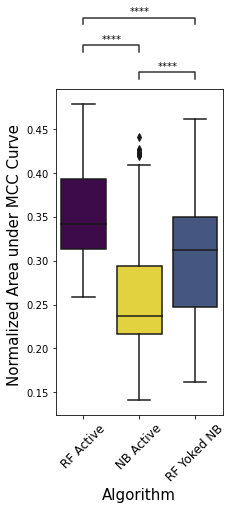

In [6]:
labels_df, auc_df = create_auc_df(dataset, teacher, student)
df = pd.DataFrame({'MCC_AUC': auc_df, 
                   'Algorithm': labels_df})

plt.figure(1)
fig, ax = plt.subplots(figsize=(3,6))
y = "MCC_AUC"
x = "Algorithm"
order = ['RF Active', 'NB Active', 'RF Yoked NB']
palette = ['#440154', '#fde725',  '#3b528b']

ax = sns.boxplot(data=df, x=x, y=y, order=order, palette=palette)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("RF Active", "RF Yoked NB"), ("RF Yoked NB", "NB Active"), ("NB Active", "RF Active")],
                                   test='t-test_ind', text_format='star',
                                   loc='outside', verbose=2)
ax.set_ylabel('Normalized Area under MCC Curve ', fontsize = 15)
ax.set_xlabel('Algorithm', fontsize = 15)
plt.tick_params(axis='x', which='major', labelsize=12, labelrotation=45)
title = dataset + '_small.pdf'
#plt.savefig(title, bbox_inches="tight")